In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('games_data_2fixx.csv')
dataset

,id,game,score,leaderbord,gamers,comp_perc,rating,min_comp_time,max_comp_time,recommend to play
0,0,A Boy and His Blob,638,2.02,2194,16.5,3.2,15,20,recommended
1,1,A Hat in Time,1992,1.53,7062,35.9,4.2,15,20,recommended
2,2,A Hero and a Garden,1364,1.01,503,97.6,5.0,0,1,recommended
3,3,A Hero and a Garden (EU),1363,1.01,581,97.8,2.9,0,1,not recommended
4,4,A King's Tale: Final Fantasy XV,637,2.02,21914,14.1,3.3,4,5,recommended
...,...,...,...,...,...,...,...,...,...,...
1579,1579,36 Fragments of Midnight,1367,1.06,8472,82.3,2.5,0,1,not recommended
1580,1580,36 Fragments of Midnight (Asia),1335,1.03,2131,88.9,2.4,0,1,not recommended
1581,1581,36 Fragments of Midnight (EU),1382,1.07,12273,79.2,2.4,0,1,not recommended
1582,1582,428: Shibuya Scramble,1943,1.47,916,41.5,4.2,40,50,recommended


In [18]:
X = dataset.iloc[:,[2, 4]].values

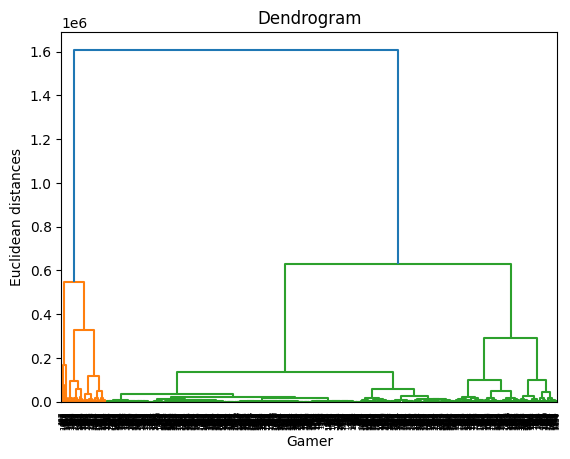

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Gamer')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


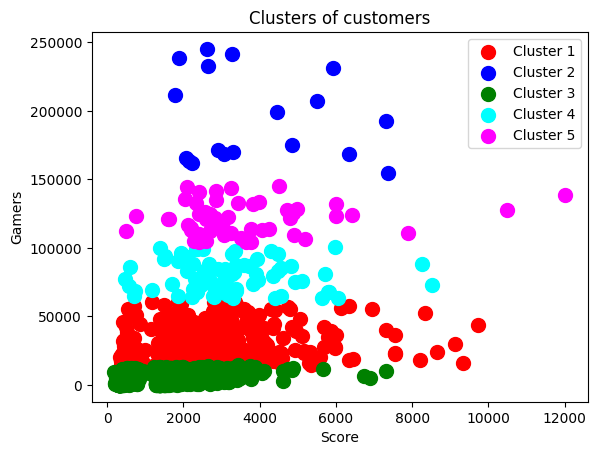

In [21]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Score')
plt.ylabel('Gamers')
plt.legend()
plt.show()